# Module 

In [258]:
import pandas as pd
import numpy as np
from termcolor import colored
from IPython.display import HTML
import matplotlib.pyplot as plt
import time
import sklearn
from check_answers import check_answers

# Der Data-Science Lifecycle

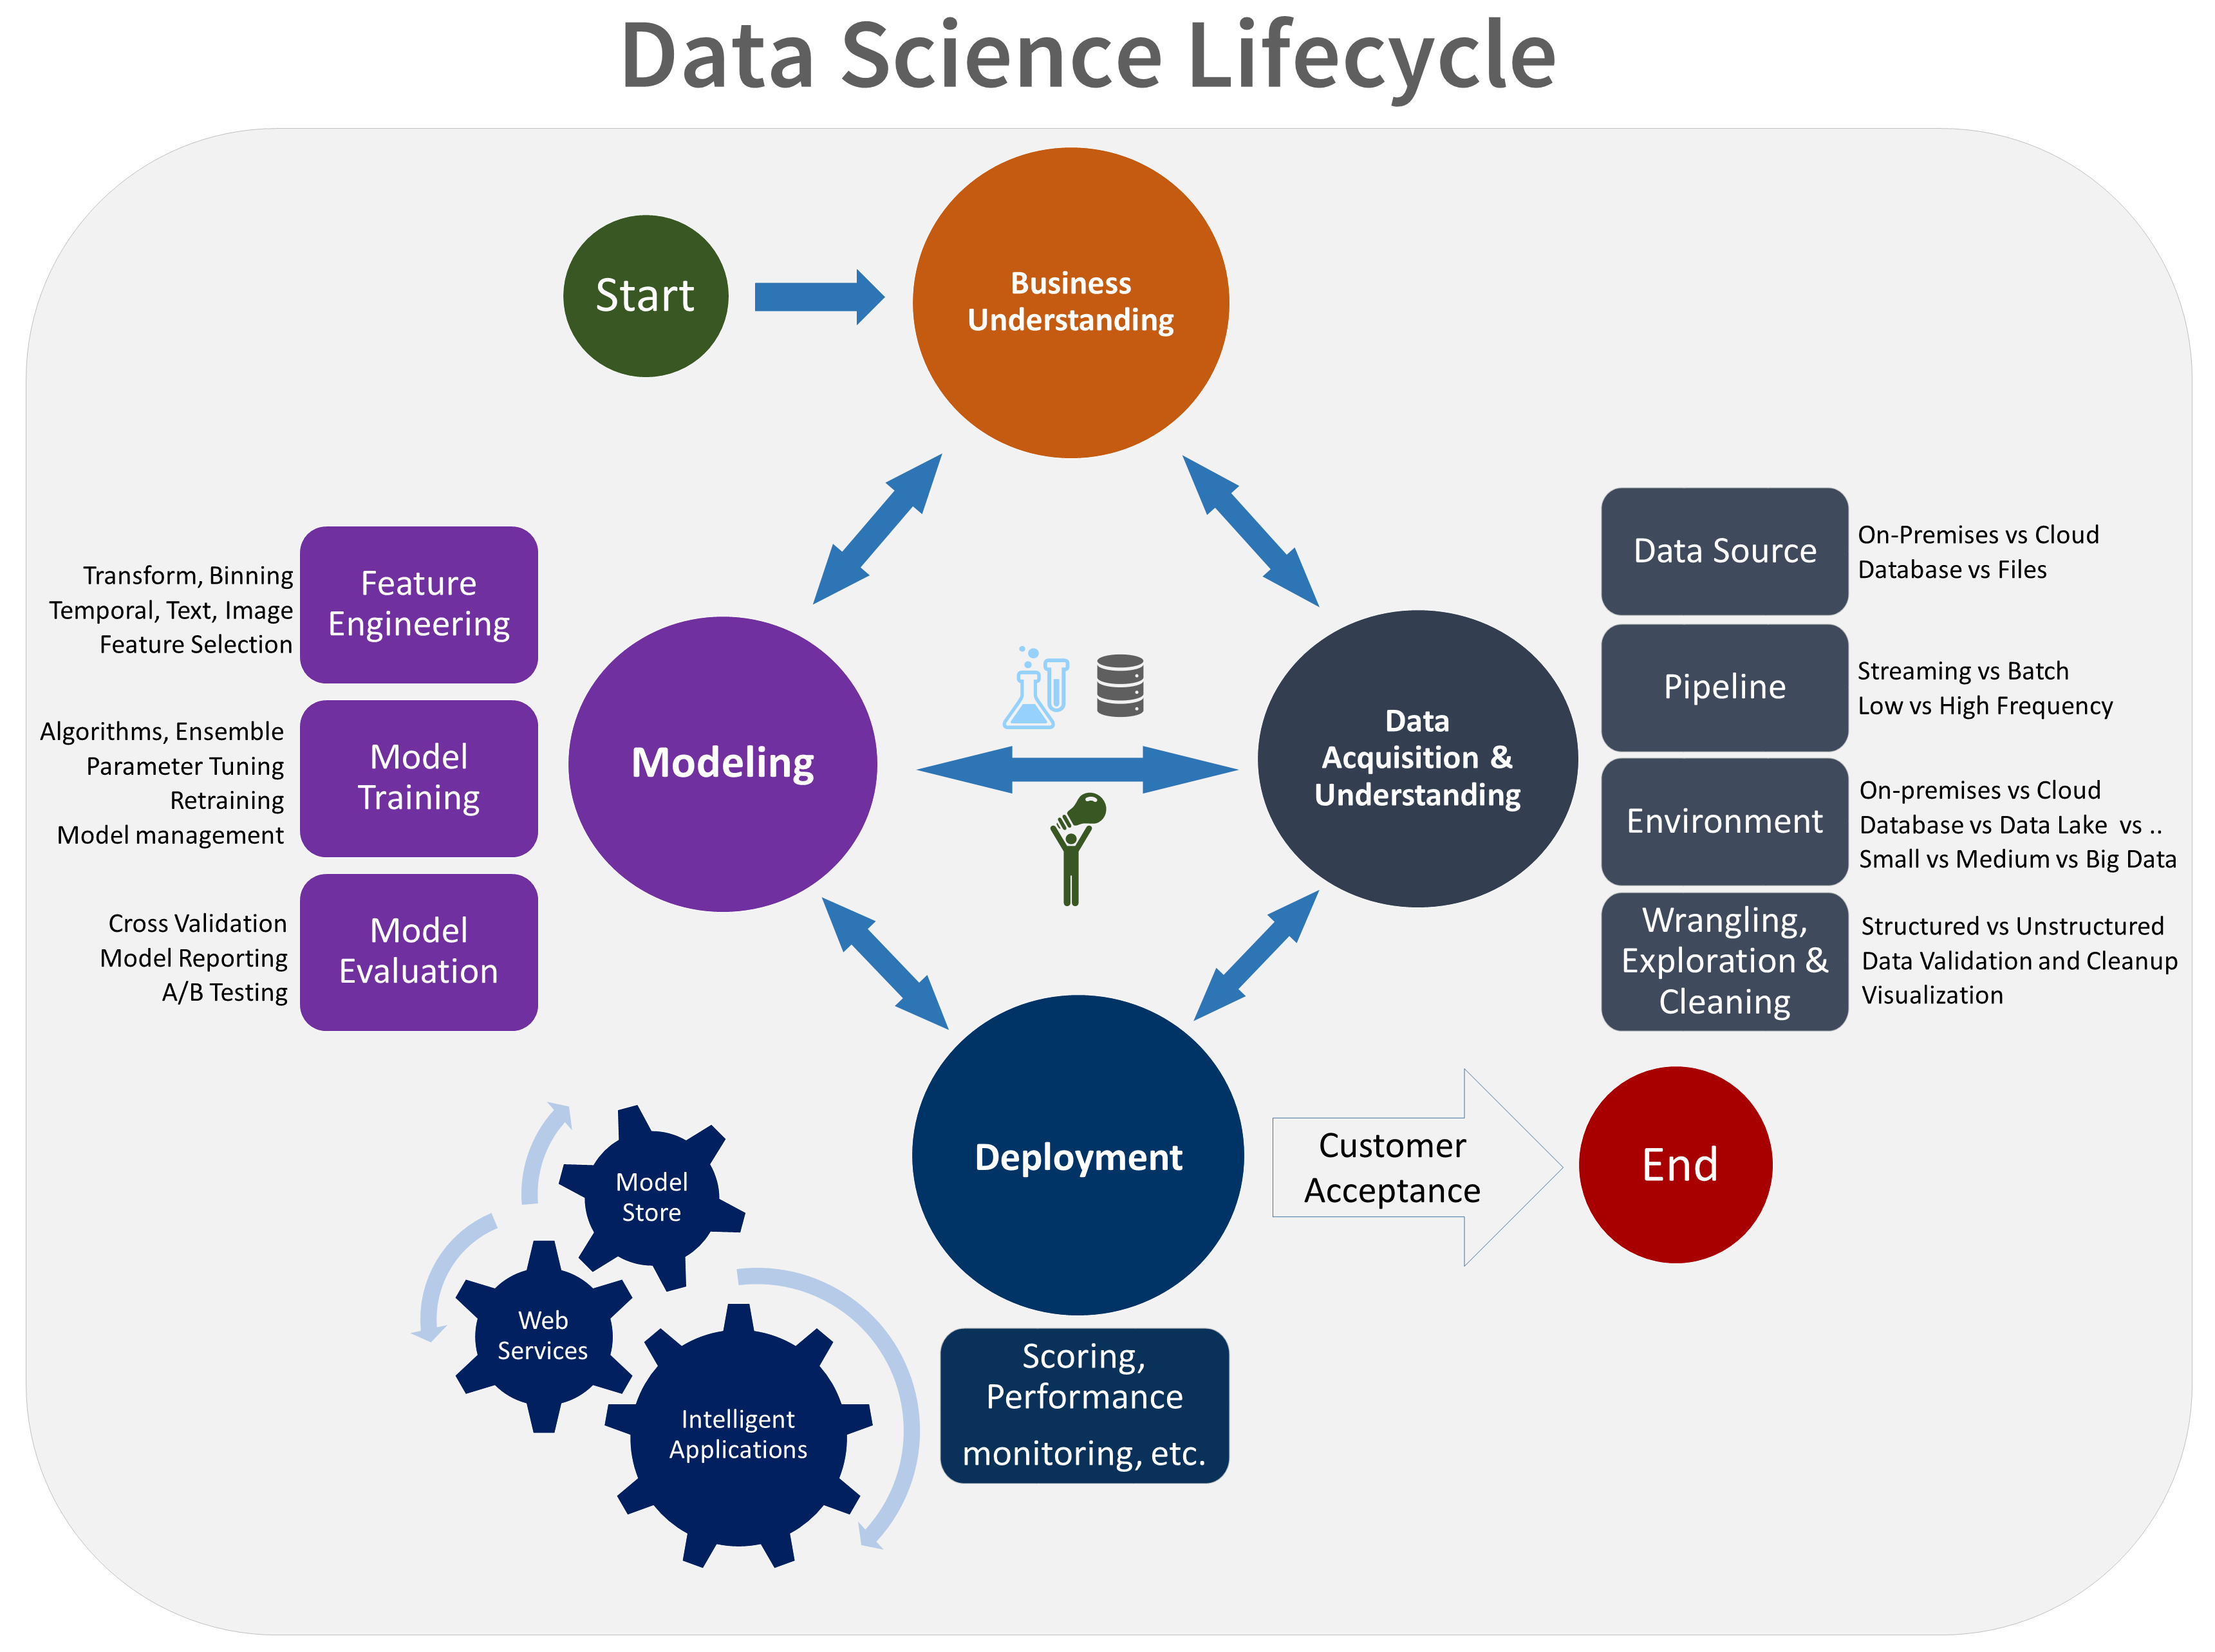[Quelle: Microsoft](https://docs.microsoft.com/de-de/azure/machine-learning/team-data-science-process/overview)

Es existieren verschieden Varianten, einen Data Science-Prozess zu beschreiben. Der vorliegende Zyklus entspricht der Definition von Microsoft. Eine weitere bekannte Variante ist der *Crisp-DM* (Cross-Industry Standard Process for Data-Mining ([IBM](https://www.ibm.com/support/knowledgecenter/de/SS3RA7_sub/modeler_crispdm_ddita/clementine/crisp_help/crisp_overview.html))).

# Business Understanding 

Im Rahmen dieses Projektes wollen wir eine Kündigungsprognose erstellen. Zuerst muss definiert werden, wie eine Kündigung verstanden wird. In diesem Beispiel gehen wir von einer **harten Kündigung** aus: Der Kunde reicht eine Kündigung ein und initiiert somit das Ende eines Vertragsverhältnisses. Die zur Verfügung stehenden Daten des Unternehmens liegen in diesem Falle als csv vor. Das Unternehmen möchte potenzielle Kündiger in der Bearbeitung von Beschwerden und Aufträgen prioritär behandeln. Eine proaktive Ausgabe von Rabattierungen ist nocht vorgesehen. In Absprache mit unserem Chef haben wir festgelegt, dass Sensitivität wichtiger sein sollte als Präzision. 

# Data Wrangling 

## Einlesen und Sichten der Daten 

In [217]:
# Kundenstamm
df_kundenstamm=pd.read_csv('Basetable.csv',sep=';',encoding='latin-1')

# Beschwerden
df_beschwerden=pd.read_csv('Complaints.csv',sep=';',encoding='latin-1')

# Geräte
df_geräte=pd.read_csv('Devices.csv',sep=';',encoding='latin-1')

In [209]:
# Nicht verändern
check_answers.check_load(df_kundenstamm,df_geräte, df_beschwerden)

Das hat geklappt!
Das hat geklappt!
Das hat geklappt!


<details><summary>Lösung</summary>
<p>

```python

Beispiel einer Lösung    
    
```
</p>
</details>

Lasst euch die ersten 10 Zeilen anzeigen, [kleiner Tipp](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html). 

In [211]:
# Deinen Code hier


In [213]:
# Werft einen Blick auf die Beschwerden 
# Deinen Code hier 


In [214]:
# Werft einen Blick auf die Geräte
# Deinen Code hier 


Klassische Dataframe Operationen werden über die Syntax $$DataFrame.Operation()$$ initiiert.

Da scheint ein doppelter Index zu sein ($Unnamed: 0$), den brauchen wir definitv nicht. 
Hier kann ich euch Folgendes empfehlen: [droppen](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html).

In [ ]:
# Schreibt den Code, sodass die unnötige Spalte verschwident. Benutze den Inplace-Parameter!


In [ ]:
# Nicht verändern
check_answers.check_drp_col(df_kundenstamm)

In [222]:
# Vervollständigt die vorliegende Funktion - Achtung: Jetzt wird der Inplace-Parameter nicht mehr benötigt! 

def drop_col(df):
    '''
    Input:
    df = Datensatz
    
    Output: 
    df_clean = bereinigter Datensatz
    '''
    try:
        df_clean = 
        return df_clean
    except: 
        print('"Unnamend: 0" bereits gelöscht')
        return df

In [223]:
# Wenden wir die Funktion an 


In [ ]:
# Nicht verändern 
check_answers.check_unnamend(df_geräte,df_beschwerden)

## Inspektion der Daten 

Es gibt verschiedene Möglichkeiten sich einen kurzen Überblick über einen Datensatz zu beschaffen. Die Option eines schnellen Überblicks über metrische Daten gewährt der **describe()**-Befehl. Die Beschreibung hierfür findet ihr [hier](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html).

In [225]:
# Wendet den Describe Befehl auf den Kundenstamm-Datensatz an. 


In [226]:
# Metriken können auch einzeln über die oben angesprochene Syntax durchgeführt werden. 
# sum() und min()
df_kundenstamm['Anzahl_Mieteinheiten'].sum(), df_kundenstamm.Anzahl_Mieteinheiten.min()

(2386093, 2)

In [227]:
df_kundenstamm[['Anzahl_Mieteinheiten','Kündigung']].sum()

Anzahl_Mieteinheiten    2386093
Kündigung                  2234
dtype: int64

Eine einzelne Spalte kann durch die folgende Syntax addressiert werden:
* 1) $DataFrame['Spaltenname']$ , oder <br>
* 2) $DataFrame.Spaltenname$ <br>
Operationen an mehreren Spalten gleichzeitig erfordern eine gleichzeitige Verwendung des List- als auch das Index-Operators - dies entspricht der Verwendung doppelter Klammern [[ ]]: 
* 3) $DataFrame[['Spalte1','Spalte2']].sum()$

In [ ]:
# Wie liegt denn die durchschnittliche Anzahl an Mieteinheiten? 
mean_anz_miet = round('Deinen Code hier')

In [ ]:
# Nicht verändern 
check_answers.check_mean(mean_anz_miet,df_kundenstamm)

Die Kundennummer sollte eigentlich als String konvertiert sein, denn rechnen wollen wir damit nicht. Als eindeutiger Schlüssel hilft sie uns später dabei die Tabellen zu fusionieren. Wir sollten wohl die Datentypen überpüfen!

### Datentypen 

Pandas bietet natürlich eine [Möglichkeit](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html), Datentypen zu überprüfen, während Numpy dabei helfen kann, Datentypen zu [manipulieren](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.astype.html). Lassen wir uns erstmal die Datentypen anzeigen! 

In [230]:
# Lasst euch die Datentypen für alle Spalten anzeigen!


In [ ]:
# Jetzt sollten wir der Kundennummer einen neuen Datentyp zuweisen 
df_kundenstamm['Kundennummer']=df_kundenstamm['Kundennummer'].astype(str)

In [ ]:
# Nicht verändern
check_answers.check_typ_str(df_kundenstamm['Kundennummer'])

In [232]:
# Jetzt seid ihr an der Reihe überprüft: Überprüft die Datentypen in den anderen Datensätzen 
# und ändert diese ggf.  


In [ ]:
# Nicht verändern 
check_answers.check_typ_str(df_beschwerden['KD.NR'],df_geräte['Kundennummer'])

### Doppelte Einträge 

Im [ETL-Prozess](https://www.geeksforgeeks.org/etl-process-in-data-warehouse/) können hin und wieder Fehler passieren. Ein klassischer Fehler ist das Entstehen von Duplikaten. Pandas bietet hierfür eine Möglichkeit, dies zu überprüfen: [duplicated()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html). Der *duplicated*-Befehl führt eine boolsche-Überprüfung aus und das Ergebnis kann summiert werden. [*drop_duplicates*](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html) wiederrum entfernt Duplikate.  

In [234]:
# Überprüft den df_kundenstamm auf mögliche Duplikate und gibt die Summe aus.
df_kundenstamm.duplicated().sum()

20

In [ ]:
# Entfernt die duplicate vom Datensatz und verwendet den inplace-Parameter
df_kundenstamm.drop_duplicates(inplace=True)

In [ ]:
# Nicht verändern 
check_answers.check_dupl(df_kundenstamm)

### Joining 

In [236]:
# Es empfiehlt sich in regelmäßigen Abständen die Daten zu sichern, um nicht von vorne anzufangen
df_k=df_kundenstamm.copy()
df_b=df_beschwerden.copy()
df_g=df_geräte.copy()

Datensätze kommen oftmals aus unterschiedlichen Quellen und müssen über Schlüsselfelder zusammengeführt werden. Es gibt diverse Join-Varianten, damit jedoch keine Duplikate entstehen, wird in der Regel ein 1:1-Join verwendet. Hierfür ist es notwendig zu wissen, auf welcher Ebene Tabellen geführt werden. 
Mittels des [shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html)-Befehls kann man sich die Anzahl an Zeilen und Spalten eines Datensatzes anzeigen lassen.

In [237]:
# Wendet den shape-Befehl auf alle Datensätze an
df_k.shape

(10000, 8)

In [238]:
df_g.shape

(10000, 2)

In [239]:
df_b.shape

(1048575, 2)

In [ ]:
# Welchen Datensatz müssen wir uns vor dem joinen genauer Ansehen? 
# Gib den Namen des Datensatzes an 
antwort='NAMEN EINGEBEN'

In [ ]:
# Nicht verändern 
check_answers.check_shape(antwort)

Wie lösen wir das Problem? Hier kann ich euch nur folgende Tipps geben: [pd.get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html), [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) und den *sum*-Befehl. Wichtig: Der *get_dummies*-Befehl ist kein Dataframe-Befehl. 

In [245]:
# Deinen Code hier 


In [243]:
# Der Index muss wiederhergestellt werden
df_b_grp.reset_index(inplace=True)

<details><summary>Lösung</summary>
<p>


```python
pd.get_dummies(df_b,columns=['Beschwerden'],prefix='',
                        prefix_sep='').groupby('KD.NR').sum()
```

</p>
</details>

In [ ]:
# Nicht verändern 
check_answers.check_grp(df_b_grp)

Je nach Erfordnernis unterscheidet sich das [Join]-Verfahren und somit auch die Spezifika des Joins. Hier liegt eine dominante Tabelle vor - *df_beschwerden oder df_b* - und wir wollen die zusätzlichen Informationen für weitere Analysen hinzuspielen. 

Demnach müssen wir hierfür einen *left-join* ausführen.

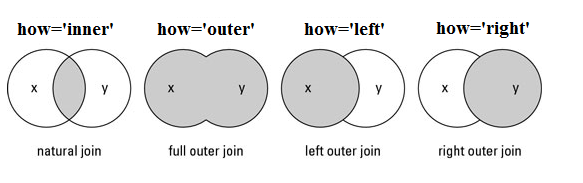(Quelle: [DataScienceMadeSimple](https://www.datasciencemadesimple.com/join-merge-data-frames-pandas-python/)) 

Hierfür könnt ihr unteranderem den Befehl [merge()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) verwenden. Sollte etwas nicht funktionieren, schaut euch den *merge*-Befehl genau an. Ihr könnt aber auch den [rename](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)-Befehl verwenden.

In [247]:
# Joine die gruppierten Beschwerden (df_b_grp) an den Kundenstamm (df_k)
df_kb=df_k.merge(df_b_grp, how='left',left_on='Kundennummer',right_on='KD.NR')

In [248]:
# Joine jetzt die Geräte dran 
df_fin=df_kb.merge(df_g,how='left',on='Kundennummer')

In [254]:
df_fin

Kundennummer                        Kundenname                 Stadt  \
0           21197                 Hans-Detlef Riehl           Halberstadt   
1           68717          Timm Schäfer-Grein Groth               Ansbach   
2           20557                      Erwin Hornig               Malchin   
3           77488               Ing. Wolfgang Mühle           Illertissen   
4           70151  Dipl.-Ing. Therese Schleich B.A.              Hannover   
...           ...                               ...                   ...   
9995        17062           Dr. Katalin Wagner MBA.              Herzberg   
9996         6140                Monja Hermann MBA.               Bamberg   
9997        47714          Prof. Kreszenz Pohl MBA.  Neustadtner Waldnaab   
9998        41157                   Meta Schweitzer              Rathenow   
9999        51960                  Pascal Cichorius              Lüneburg   

         Kundengruppe  Kündigung  Anzahl_Mieteinheiten       Kundentyp  \
0          Kleinkunde          0                    18  Bestandskunden   
1          Kleinkunde          0                    16  Bestandskunden   
2          Kleinkunde          1                    36        Neukunde   
3          Kleinkunde          0                    41        Neukunde   
4           Großkunde          0                   215  Bestandskunden   
...               ...        ...                   ...             ...   
9995       Kleinkunde          1                    34  Bestandskunden   
9996        Großkunde          0                   959       Altkunden   
9997       Kleinkunde          1                    28        Neukunde   
9998  mittlerer Kunde          0                   159  Bestandskunden   
9999        Großkunde          0                   805       Altkunden   

                Konkurrenz  KD.NR  Beschwerden_leichte Beschwerde  \
0     mittlerer Konkurrenz    NaN                             NaN   
1         Keine Konkurrenz    NaN                             NaN   
2          Hohe Konkurrenz    NaN                             NaN   
3         Keine Konkurrenz  77488                           225.0   
4         Keine Konkurrenz  70151                           225.0   
...                    ...    ...                             ...   
9995       Hohe Konkurrenz    NaN                             NaN   
9996  mittlerer Konkurrenz    NaN                             NaN   
9997      Keine Konkurrenz  47714                             0.0   
9998      Keine Konkurrenz  41157                           233.0   
9999  mittlerer Konkurrenz  51960                           219.0   

      Beschwerden_mittlere Beschwerde  Beschwerden_schwere Beschwerde  \
0                                 NaN                             NaN   
1                                 NaN                             NaN   
2                                 NaN                             NaN   
3                               125.0                             0.0   
4                               124.0                             0.0   
...                               ...                             ...   
9995                              NaN                             NaN   
9996                              NaN                             NaN   
9997                              0.0                           350.0   
9998                            117.0                             0.0   
9999                            130.0                             0.0   

       Gerätetyp  
0     DeviceGen2  
1     DeviceGen2  
2     DeviceGen4  
3     DeviceGen3  
4     DeviceGen3  
...          ...  
9995  DeviceGen2  
9996  DeviceGen2  
9997  DeviceGen4  
9998  DeviceGen3  
9999  DeviceGen2  

[10000 rows x 13 columns]

<details><summary>Lösung</summary>
<p>

**Variante 1:**
```python
    
    # Schritt 1     
    df_kb=df_k.merge(df_b_grp, how='left',left_on='Kundennummer',right_on='KD.NR')

    # Schritt 2 
    df_fin=df_kb.merge(df_g,how='left',on='Kundennummer')    
    
```
**Variante 2:**
```python

    
    df_b_grp.rename(columns={'KD.NR':'Kundennummer'},inplace=True)

    und dann **Variante 1**
```
</p>
</details>

In [ ]:
# Nicht verändern 
check_answers.check_join(df_fin)

### Missings 

Fehlende Werte wären in einer weiteren Analyse ein Problem. Viele Algorithmen des maschinellen Lernens können mit NaN's nicht umgehen. NaN's können über den Befehl [isna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html) identifiziert werden. Auch hier ist das Ergebnis ein bool und kann summiert werden. 

In [276]:
# Lasst euch die NaN's für alle Spalten anzeigen


Pandas verfügt über diverse Möglichkeiten eine Query zu schreiben. Eine Möglichkeit besteht aus dem [Selektieren](https://chrisalbon.com/python/data_wrangling/pandas_selecting_rows_on_conditions/) von Daten.
Die Syntax sieht dann in etwas so aus:

$$DataFrame[DataFrame.Condition]]$$


Wollen wir uns mal die fehlenden Datensätze anschauen. P.S: kleiner [Cue](https://datatofish.com/rows-with-nan-pandas-dataframe/) 

In [275]:
# Deinen Code hier


In [277]:
# Ersetze die fehlenden Werte mit 0 - da hilft fillna!
# Deinen Code hier 


<details><summary>Lösung</summary>
<p>
    
**NAs:**
```python
    
 df_fin[df_fin.isna().any(axis=1)]   
    
```    
**Fillna:**
```python

df_fin.fillna(0,inplace=True)    
    
```
</p>
</details>

In [ ]:
# Nicht verändern 
check_answers.check_na(df_fin)

In [280]:
# Werfen wir nochmal gemeinsam einen letzten Blick auf die ersten 10 Zeilen des Datensatz


# Explorative Datenanalyse 

Bei der explorativen Datenanaylse geht es darum, sich einen Eindruck über Häufigkeiten und Relationen in den Datensätzen zu bilden. Hierbei helfen vor allem graphische Hilfsmittel. Aber auch einige Pandas Befehle können hierbei hilfreich sein.

## Univariate Verteilungen 

Für die Auswertung univariater Verteilungen bietet Pandas einige Befehle, um sich einen Überblick zu beschaffen: *Sum()* und Co. habt ihr ja bereits kennengelernt. [value_counts()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html),*groupby* und [aggregate()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.aggregate.html) können dabei enorm hilfreich sein. Für einen kleinen Überblickt kann ich euch die Artikel von [Chelliah](https://medium.com/towards-artificial-intelligence/exploring-descriptive-statistics-using-pandas-and-seaborn-1b8501e1f27f) und von [Lynn](https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/) empfehlen.

Für den schnellen aber nicht unbedingt umwerfenden Plot, bietet Pandas auch die [plot()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)-Funktion. Vorteilhaft ist, dass sich diese in Verkettung von Pandas-Befehlen einsetzen lässt. Die *Plot*-Funktion greift im Default auf das graphische Backend von [Matplotlib](https://matplotlib.org/) zurück.

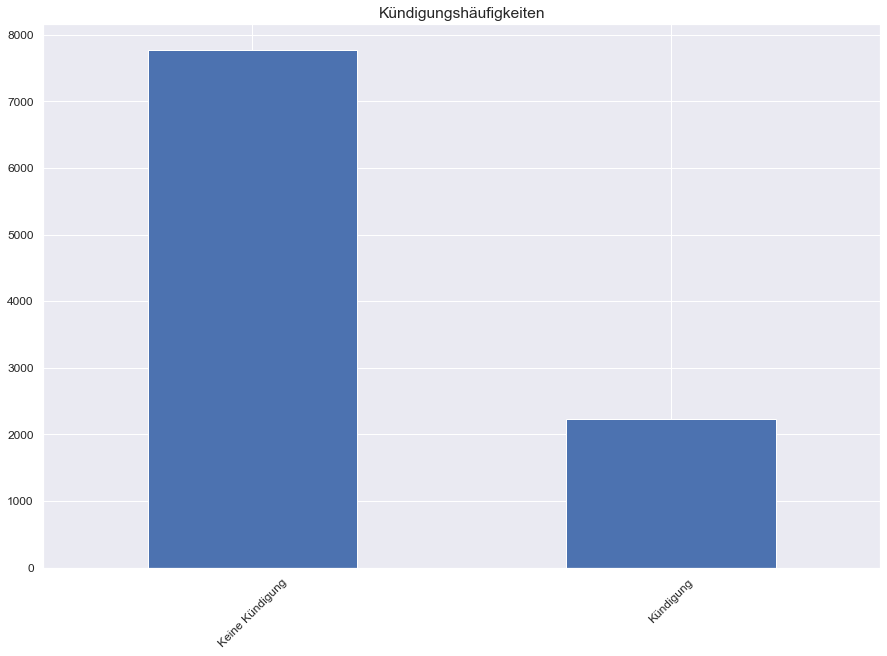

In [281]:
# Wie sieht das Verhältnis von nicht gekündigten zu gekündigten Kunden aus?
df_fin['Kündigung'].value_counts().plot(kind='bar',fontsize=12,
                                        figsize=(15,10),title='Kündigungshäufigkeiten',rot=45)
plt.xticks([0,1],['Keine Kündigung','Kündigung'])
# Zusatzinformationen ausblenden
plt.show();

Jetzt seid ihr an der Reihe! Sucht euch ein bis zwei weitere Spalten aus und bastelt eine Grafik/Tabelle dazu. Je nachdem was ihr euch anschauen wollt, müsst ihr eventuell zunächst dummyisieren, summieren/den Durchschnitt bilden etc. und das Ergebnis als neuen DataFrame ablegen. Interessant wären beispielsweise: 
 + Geräte
 + Beschwerden
 + Regionale Konkurrenz
 + Kundengruppen
 + Kundentyp

In [ ]:
# Erste Grafik/Tabelle




In [ ]:
# Zweite Grafik/Tabelle 


## Bivariate Verteilungen 

In diesem Schritt geht es verstärkt darum, Zusammenhänge zwischen dem Zielattribut (Kündigung) und anderen Attributen zu erkennen. Für eine tabellarische Darstellung, könnt ihr den Befehl *value_counts()* über die zu interessierenden Spalten laufen lassen! Ihr könnt aber auch den Befehl [pd.crosstab()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) benutzen. Ob ihr plotten wollt, ist euch überlassen! 
Hier könnt ihr Folgendens auswerten:
 + Geräte nach Kündigungen 
 + Beschwerde-Kategorien nach Kündigungen
 + Regionale Konkurrenz und Kündigungen
 + Kundengruppen und Kündigungen 
 + Kundentyp nach Kündigung

In [ ]:
# Beginnen wir mit der Verteilung von Kündigung und Kundengruppe
# Deinen Code hier 


<details><summary>Lösung</summary>
<p>
   
**Variante 1:**    
```python

    df_fin[['Kündigung','Kundengruppe']].value_counts()
        
```
    
**Variante 2:** 

```python

    pd.crosstab(df_fin['Kündigung'],df_fin['Kundengruppe'])
        
```   
    
</p>
</details>

Jetzt seid ihr an der Reihe! Sucht euch ein bis zwei weitere Spalten aus und bastelt eine Grafik/Tabelle dazu.

In [ ]:
# Erste Grafik/Tabelle


In [ ]:
# Zweite Grafik/Tabelle 


## Exkurs: Puclication-Ready/Dashboard Plots

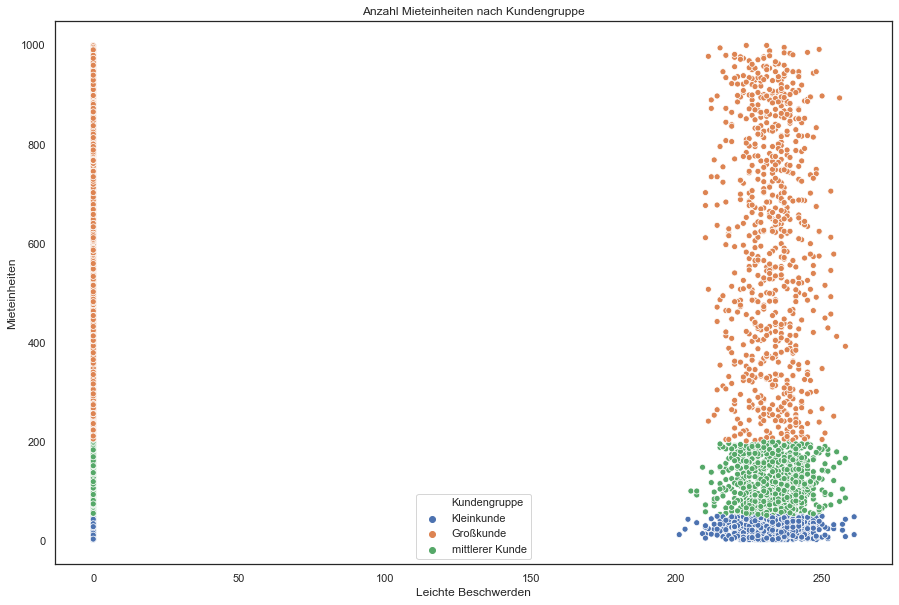

In [282]:
import seaborn as sns
sns.set(style="white")
plt.figure(figsize=(15,10))
fig=sns.scatterplot(data=df_fin, x="Beschwerden_leichte Beschwerde", y="Anzahl_Mieteinheiten", 
                    hue="Kundengruppe")
fig.set_title('Anzahl Mieteinheiten nach Kundengruppe')
fig.legend
fig.set_xlabel('Leichte Beschwerden')
fig.set_ylabel('Mieteinheiten')
plt.show();

In [283]:
import plotly.io as pio
pio.renderers.default='notebook'
import plotly.express as px
#import ipywidgets as widgets
#import plotly.io as pio
#pio.renderers.default='notebook'
#%pylab inline
#pyo.init_notebook_mode()
fig = px.scatter(df_fin, x="Beschwerden_leichte Beschwerde", y="Anzahl_Mieteinheiten", 
                 color="Kundengruppe")
fig.show("notebook");

# Machine-Learning

## Datenvorbereitung 

Nicht jede Spalte/Variable - im Machine Learning-Sprech: Feature - ist für eine Analyse relevant. Eindeutige Keys (Kd-Nummern, ID's etc.) sind für einen Algorithmus irrelevant. Ebenfalls gilt das Credo der Komplexitätsreduktion! Daher beginnen wir zuerst mit der Reduktion der Daten. Lasst euch mit dem Befehl [columns](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html) alle Spaltennamen ausgeben. 

In [285]:
# Deinen Code hier 


In [43]:
# Welche Informationen sollen wir behalten ? 
# Reminder: Drop-Befehl 
ml_df=

<details><summary>Lösung</summary>
<p>

***Variante 1:***    
```python

ml_df=df_fin.drop(['Kundennummer','Kundenname','Stadt','KD.NR',
    'Anzahl_Mieteinheiten'],axis=1)
    
```
***Variante 2:***
```python
ls=['Kundennummer','Kundenname','Stadt','KD.NR','Anzahl_Mieteinheiten']   
ml_df=df_fin.drop(ls,axis=1)
```

***Variante 3 - ProTip (Robust gegenüber Spaltennamen):*** 
```python
ls=['Kundennummer','Kundenname','Stadt','KD.NR','Im Bestand seit','Vertrag','Anzahl_Mieteinheiten','Jahre','Testspalte']

diff_ls=[x for x in df_fin.columns if x not in ls]

ml_df=df_fin[diff_ls]   
 ```   
    
</p>
</details>

In [ ]:
# Nicht verändern
check_answers.check_mldf(ml_df)

Wie ihr vielleicht bereits festgestellt habt, müssen wir einige Spalten dummysieren! Schaut euch den Datensatz an und überlegt euch, wie ihr das machen wollt :-)! 

In [288]:
# Deinen Code Hier 
dummy_ls=

ml_dummy=

<details><summary>Lösung</summary>
<p>

***Variante 1:***    
```python

dummy_ls=['Kundengruppe','Kundentyp','Konkurrenz','Gerätetyp']

ml_dummy=pd.get_dummies(ml_df,columns=dummy_ls,prefix=None)
    
```
***Variante 2:***
```python
ml_dummy=pd.get_dummies(ml_df,columns=['Kundengruppe','Kundentyp','Konkurrenz','Gerätetyp'],prefix='', prefix_sep='')
```
 
</p>
</details>

In [ ]:
# Nicht verändern 
check_answers.check_ml_dummy(ml_dummy)

Damit wir im nächsten Schritt den Train Test-Split durchführen können, müssen wir jetzt den Datensatz in abhängige und unabhängige Variablen unterteilen. Ein kleiner Hint: Ihr wisst wie man Spalten aussucht, habt aber auch schon die *List-Comprehension* kennengelernt! 

In [290]:
Y=
X=

<details><summary>Lösung</summary>
<p>

```python

y_ls=['Kündigung']

Y=ml_dummy['Kündigung']
X_ls=[x for x in ml_dummy.columns if x not in y_ls]
X=ml_dummy[X_ls]
    
```    
</p>
</details>

In [ ]:
# Nicht verändern
check_answers.check_X_Y(X,Y)

## Train Test-Split

Der [Train-Test-Split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) ist ein elementarer Bestandteil, um aus den gleichen Daten einen Trainingsdatensatz sowie einen Testdatensatz zu erstellen.Somit können wir Erkenntnisse aus dem Trainingsdatensatz am Testdatensatz evaluieren und weiter optimieren. Der Train Test-Split randomisiert die Daten automatisch! Ergänzend dazu, kann die [Kreuzvalidierung](https://www.youtube.com/watch?v=fSytzGwwBVw) verwendet werden. Diese Methode spaltet die Daten in k-fache Elemente und wiederholt die Schätzung k-mal. Vor allem bei der Selektion des Algorithmus' und dem Tuning der Hyperparameter erweist sich die Kreuzvalidierung als nützlich!

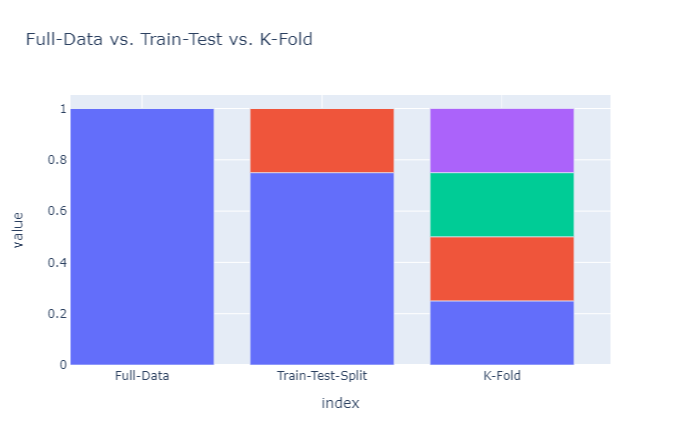

Jetzt seid ihr an der Reihe - wendet den Train Test-Split auf X und Y an und erstellt eine Test-Size von 0.25 bei einem random-state von 42. 

In [293]:
# Importieren der Funktion


# Deinen Code hier
X_train, X_test, y_train,y_test = 

<details><summary>Lösung</summary>
<p>

```python

X_train, X_test, y_train,y_test = train_test_split(X,Y, stratify=Y,random_state=42, test_size=0.25)
    
```    
</p>
</details>

In [ ]:
# Nicht verändern
check_answers.check_train_test(X_train,X_test)

## Exkurs: Beispiel einer Accuracy bei K-Fold, Train Test und Full-Data

In [296]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import balanced_accuracy_score

cv=10
print(f'{cv}-fache Kreuzvalidierung:{cross_val_score(LogisticRegression(class_weight="balanced"),X_train,y_train,cv=cv,scoring="balanced_accuracy")}')

print(f'Einfacher Train-Test: {LogisticRegression(class_weight="balanced").fit(X_train,y_train).score(X_test,y_test)}')
print(f'Ohne Train-Test-Split: {LogisticRegression(class_weight="balanced").fit(X,Y).score(X,Y)}')

10-fache Kreuzvalidierung:[0.85653907 0.88474851 0.88264295 0.88225265 0.85527573 0.88348517
 0.89377677 0.86210598 0.88050657 0.8492723 ]
Einfacher Train-Test: 0.8652
Ohne Train-Test-Split: 0.8706


## Standard Scaling

Viele Algorithmen können nicht besonders gut mit metrischen Daten auf unterschiedlichen Skalenniveaus arbeiten. Hier gibt es zwei Varianten, um die Niveaus anzupassen: [Min-Max-Skalierung](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) und [Standardisierung](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Wir werden jetzt letztere verwenden, hierbei gilt: 

$$z=\frac{x-\mu}{\sigma}$$

Schauen wir uns erstmal die metrischen Features an!

In [297]:
## Mit dem Befehl "select_dtypes" können wir bestimmte Datentypen vom Datensatz extrahieren
X_feat=X_train.select_dtypes(include=['float','int64']).columns

## Loop zur Erstellung von Min und Max werten
for i in X_feat:
    print(i)
    print(X_train[i].min())
    print(X_train[i].max())

Beschwerden_leichte Beschwerde
0.0
261.0
Beschwerden_mittlere Beschwerde
0.0
148.0
Beschwerden_schwere Beschwerde
0.0
350.0


Jetzt seid ihr wieder an der Reihe:-): 1. Importiert den Standardscaler, weist diesen zu und wendet ihn an. Ihr werdet euch bestimmt daran erinnern, was man mit DataFrames und Listen alles machen kann. Ganz wichtig: Es gibt einen immensen Unterschied zwischen fit, fit_transform und transform! Aber dazu erzähle ich gleich was. Ihr könnt es aber auch [nachlesen](https://stackoverflow.com/questions/23838056/what-is-the-difference-between-transform-and-fit-transform-in-sklearn). <br>
P.S.: Der Output entsteht, weil ihr Daten überschreibt! 

In [298]:
# Importieren des StandardScaler
from sklearn.preprocessing import StandardScaler

# Wiest diesen zu
scaler=

# Scaliert die Daten - das hier kann auch in zwei Schritten erfolgen! 
X_train[X_feat]=

<ipython-input-298-4951df14d61f>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\users\ashrafib\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<details><summary>Lösung</summary>
<p>

```python

# Importiert den StandardScaler 
from sklearn.preprocessing import StandardScaler

# Wiest diesen zu
scaler=StandardScaler()

# Scaliert die Daten - das hier kann auch in zwei Schritten erfolgen! 
X_train[X_feat]=scaler.fit_transform(X_train[X_feat])
    
```    
</p>
</details>

Die Testdaten werden am Beispiel der Trainingsdaten transformiert. Der Standard Scaler wird also nicht nochmal gefittet!!!!

In [299]:
# Deinen Code hier
X_test[X_feat]=scaler.transform(X_test[X_feat])

<ipython-input-299-ad4fd1c2ac1d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\users\ashrafib\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<details><summary>Lösung</summary>
<p>

```python
X_test[X_feat]=scaler.transform(X_test[X_feat])
    
```    
</p>
</details>

## Basis Klassifizierer

Als Grundlage dient ein Basis KLassifizierer. Dieser [Dummy Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html), trifft auf Basis einfacher Gewichtungen, Entscheidungen über den Ereigniseintritt. Diesen zu *übertreffen* sollte angestrebt werden.    

In [300]:
# Dummy Klassifizierer
from sklearn.dummy import DummyClassifier

In [301]:
# Dummy_clf definieren
dummy_clf = DummyClassifier(strategy='stratified')

# Dummy_clf fitten
dummy_fit=dummy_clf.fit(X_train, y_train)

# Dummy Prediction
dummy_yhat = dummy_fit.predict(X_train)

# Score
dummy_fit.score(X_train,y_train)

0.6466666666666666

Die klassische ML-Abfolge besteht aus den Schritten *fit*, *predict* oder *predict_proba*-(für predict_probability) und *score*. Damit ihr euch an den Ablauf gewöhnen könnt, gehen wir den Ablauf anhand einer logistischen Regression durch. Wir bleiben dabei aber bei den Trainingsdaten. Ihr könnt euch am Beispiel von [Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) orientieren. Wichtig: Ein Schätzer muss für die *predict*-Funktion und für die *score*-Funktion nicht unbedingt zugewiesen werden.

In [ ]:
# Zuweisen und fitten
logistic=
# Predict - Deinen Code hier
logistic.

# Score - Deinen Code hier 
logistic.

<details><summary>Lösung</summary>
<p>

```python
    
# Schätzer fitten
logistic=LogisticRegression(class_weight='balanced',verbose=10).fit(X_train,y_train)
# Prediction    
logistic.predict(X_train)
# Score
logistic.score(X_train,y_train)
    
```    
</p>
</details>

## Model Selection

Jetzt wird es ernst! Im Folgenden geht's an die Model Selection. Jetzt geht es darum herauszufinden, welcher Klassifizierer am besten abschneidet. Den Code habe ich hier für euch übernommen. Bitte berücksichtigt eure Hardware, bevor ihr die Zelle startet. Kommentiert eventuell in der *name-list* und in der *classífiers-list* den gleichen Klassifizierer aus. 

In [303]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

In [304]:
# Eventuell hier auskommentieren
name = [
    "Dummy Classifier",
    "Decision Tree",
    "Random Forest",
    "Logistic Reg.",
    "AdaBoost",
    "GradientBoost",
    "SVC",
    "MLP"
]

# Den gleichen Klassifizierer hier auskommentieren 
classifiers = [
    DummyClassifier(strategy='stratified'),
    DecisionTreeClassifier(class_weight='balanced'),
    RandomForestClassifier(n_estimators=150,class_weight='balanced_subsample',verbose=10),
    LogisticRegression(class_weight='balanced',verbose=10),
    AdaBoostClassifier(base_estimator=RandomForestClassifier(class_weight='balanced_subsample',verbose=10)),
    GradientBoostingClassifier(init=RandomForestClassifier(class_weight='balanced_subsample'),verbose=10),
    SVC(C=1.0,gamma='auto',verbose=10),
    MLPClassifier(hidden_layer_sizes=(50,5),activation='relu',solver='adam',verbose=10)
]

######################################### Nicht verändern ###########################################

# Scores 
results=[]
names=[]
scoring=['accuracy','precision','recall','f1','balanced_accuracy']
accuracy=[]
precision=[]
recll=[]
f1=[]


for name, clf in zip(name,classifiers):
    print(name)
    kfold=StratifiedKFold(n_splits=10)
    cv_scores=cross_validate(clf,X_train,y_train,cv=kfold,scoring=scoring,verbose=10, n_jobs=-1)
    accuracy=cv_scores['test_accuracy'].mean()
    precision=cv_scores['test_precision'].mean()
    recall=cv_scores['test_recall'].mean()
    f1=cv_scores['test_f1'].mean()   
    balanced_accuracy=cv_scores['test_balanced_accuracy'].mean()
    case={'Name':name, 'Accuracy': accuracy, \
                  'Precision': precision, 'Recall':recall,  
                  'F1': f1,'Balanced_Accuracy':balanced_accuracy}
    results.append(case)
    
result_df=pd.DataFrame(results)

Dummy Classifier


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    1.2s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    1.3s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    1.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1297s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.1s remaining:    0.0s


Decision Tree


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Random Forest


[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    1.1s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    1.1s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    1.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Logistic Reg.


[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.2s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


AdaBoost


[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:   43.3s remaining:  1.7min
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   43.5s remaining:   43.5s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:   43.6s remaining:   18.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   43.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


GradientBoost


[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    1.5s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    1.5s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    1.5s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


SVC


[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.9s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.9s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


MLP


[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    2.4s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    2.6s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    2.8s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.5s finished


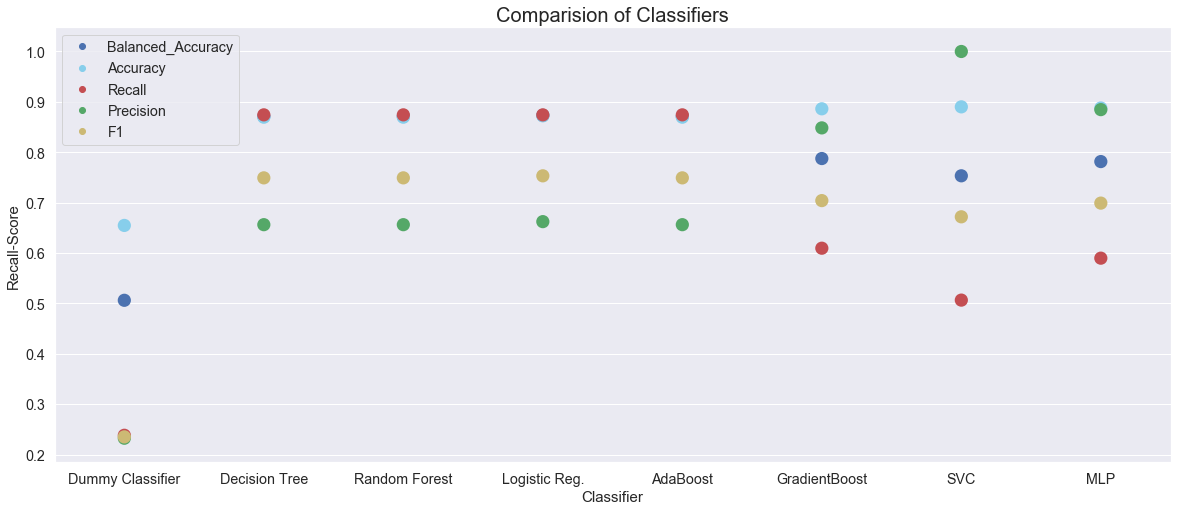

In [310]:
# Plotten aller Klassifizierer - Nicht verändern! 
from matplotlib.lines import Line2D

sns.color_palette('muted')
sns.set(font_scale=1.3)
plt.figure(figsize=(20,8))
plt.title("Comparision of Classifiers",size=20)
sns.pointplot(x="Name", y="Balanced_Accuracy", data=result_df, join=False, scale=1.5,color='b')
sns.pointplot(x="Name", y="Accuracy", data=result_df, join=False, scale=1.5,color='skyblue')
sns.pointplot(x="Name", y="Recall", data=result_df, join=False, scale=1.5,color='r')
sns.pointplot(x="Name", y="Precision", data=result_df, join=False, scale=1.5,color='g')
sns.pointplot(x="Name", y="F1", data=result_df, join=False, scale=1.5,color='y')

a = Line2D([], [], color='b', label='Balanced_Accuracy',marker='o',linestyle = 'None')
a2 = Line2D([], [], color='skyblue', label='Accuracy',marker='o',linestyle = 'None')
b = Line2D([], [], color='r', label='Recall',marker='o',linestyle = 'None')
c = Line2D([], [], color='g', label='Precision',marker='o',linestyle = 'None')
d = Line2D([], [], color='y', label='F1',marker='o',linestyle = 'None')

plt.legend(handles=[a,a2,b,c,d])
plt.xlabel('Classifier',size=15)
plt.ylabel('Recall-Score',size=15)
plt.show();

Bei tabellarischen Daten brillieren in der Regel Entscheidungsbäume. Die logistische Regression schneidet zwar nicht so schlecht ab, allerdings haben wir kein Wissen darüber, wie *linear* sich unbekannte Daten trennen lassen. Unter den Entscheidungsbäumen ist der [RandomForest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) der beliebteste und liefert oft sehr gute Ergebnisse. Zur Empfehlung: [Video zum RF](https://www.youtube.com/watch?v=J4Wdy0Wc_xQ).

<br>

Vorschlag: 10 Min. Kaffeepause und Lektüre des Random Forest!  


**Advanced Info:**

Als *Bagging-Algorithmus* kann dieser auch mit [*Booster*](https://scikit-learn.org/stable/modules/ensemble.html#) kombiniert werden. Der *Trendsetter* hierbei wäre jedoch der [*XGBoost*](https://xgboost.readthedocs.io/en/latest/).   

# Hyperparameter Tuning 

## Randomized CV 

Der [Randomized CV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) bietet eine einfache Möglichkeit, in das Tuning der Hyperparameter einzusteigen. Dieser iteriert über ein Set an definierten Parametern und selektiert die Parameter nach dem Zufallsprinzip. Ausgegeben werden die Parameter, die den besten Score erzielt haben.

In [311]:
# Importierung des RandomCV
from sklearn.model_selection import RandomizedSearchCV

In [195]:
# Definiert den RandomForest - achtet darauf class_weight='balanced_subsample' zu setzen 
model = 

<details><summary>Lösung</summary>
<p>

```python

 model = RandomForestClassifier(class_weight='balanced_subsample',n_jobs=-1)   
    
```    
</p>
</details>

In [196]:
# Nicht verändern - Stratifizierte Kreuzvalidierung
kfold=StratifiedKFold(n_splits=5)

Parameter über die man iterieren möchte, kann man in einem *Dictionary* hinterlegen. Dabei handelt es sich um einen Python Dateityp, welcher aus *Key:Value*-Paaren besteht. Schaut euch die Liste an und überlegt euch, ob ihr noch Parameter ergänzen würdet. Ihr könnt diesbezüglich nochmal die Website vom [RandomForest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) aufrufen.

In [197]:
 params = { 
            "n_estimators":[50,100,200,300,500],
            "max_depth": [3,5,10,50,100],
            "min_samples_split":[2,5,10],
            "criterion":['gini','entropy'],
            "max_features":["auto","log2",0.5],
            "oob_score":[False,True]
            }  

In [67]:
# Zuweisung des RandomizedCV
search=RandomizedSearchCV(model,params,n_iter=50,cv=kfold, random_state=42,n_jobs=-1,
                          scoring='balanced_accuracy', verbose=10)
# Random-Search fitten
random_search=search.fit(X_train,y_train)

# Extraktion der besten Parameter
best_params=random_search.best_estimator_.get_params()

# Extraktion des besten Scores
#best_params=random_search.best_estimator_.get_params()

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:  

In [375]:
# Lasst euch die besten Parameter anzeigen 


In [199]:
# Ergänzen der Best-Params mit einem **kwargs-Argument
rf_best=RandomForestClassifier(class_weight='balanced_subsample',n_jobs=-1).set_params(**best_params)

Jezt seid ihr dran. Fittet den RandomForest, predicted die Trainingsdaten.

In [312]:
# der Fit 
rf_fit=
# und die Prediction
y_hat=

<details><summary>Lösung</summary>
<p>

```python

# der Fit 
rf_fit=rf_bist.fit(X_train,y_train)
# und die Prediction
y_hat=rf_fit.predict(X_train)
    
```    
</p>
</details>

In [313]:
# Nicht verändern
# Sehen wir uns die Ergebnisse an
from sklearn.metrics import classification_report
print(classification_report(y_train, y_hat, target_names=['Keine Kündigung','Kündigung']))

                 precision    recall  f1-score   support

Keine Kündigung       0.96      0.87      0.91      5830
      Kündigung       0.66      0.87      0.75      1670

       accuracy                           0.87      7500
      macro avg       0.81      0.87      0.83      7500
   weighted avg       0.89      0.87      0.88      7500



## GridSearch CV - Die Brutforce Variante

Gegensätzlich zum *RandomizedCV* probiert der [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) alle Kombinationsmöglichkeiten aus. Dies kann zu besseren Ergebnissen führen. Je höher die Anzahl an Parametern, desto länger die Rechenzeit!

In [314]:
from sklearn.model_selection import GridSearchCV

In [109]:
 def grid(X_train, Y_train):   
    '''
    Input: 
    X_train = x_sample
    Y_train = y_sample
    
    Return: 
    
    Best balanced_accuracy-values and best params based on gridsearch params
    '''
    

    
    model = RandomForestClassifier(class_weight='balanced_subsample',n_jobs=-1)
        
    
    param_grid = { 
            "n_estimators":[400,500,800,1000],
            "max_depth": [4,5,6,100,200],
            'max_features': ['log2','auto'],
            "min_samples_split": [4,5,6,10],
            "criterion":['gini','entropy'],
            "oob_score":[False,True]
            }
    
    grid = GridSearchCV(estimator=rf_best, param_grid=param_grid, n_jobs=-1, cv=kfold, 
                        verbose=10, scoring='balanced_accuracy')

    grid.fit(X_train, Y_train)
    

    return grid.best_score_ , grid.best_params_

In [342]:
# Anzahl der Parameter insgesamt
params_grid = { 
            "n_estimators":[400,500,800,1000],
            "max_depth": [4,5,6,100,200],
            'max_features': ['log2','auto'],
            "min_samples_split": [4,5,6,10],
            "criterion":['gini','entropy'],
            "oob_score":[False,True]
            }

dict_total=1
for i in params_grid:    
    dict_total=dict_total* len(params_grid[i])
print(dict_total*5)

3200


<font color='red'>Code bitte nicht starten! Lange Rechenzeiten möglich!</font>

In [110]:
# Gridsearch 
start=time.time()
best_score_grid , best_params_grid= grid(X_train, y_train)
end=time.time()
print("Calculation time of GridSearch was {:.2f} Minutes ".format((end-start)/60))

Fitting 5 folds for each of 640 candidates, totalling 3200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   36.7s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:   56.6s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:  

Calculation time of GridSearch was 36.67 Minutes 


In [343]:
best_params_grid={'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'log2',
 'min_samples_split': 4,
 'n_estimators': 400,
 'oob_score': False}

In [344]:
# Grid RF-definieren
rf_best_grid=RandomForestClassifier(class_weight='balanced_subsample',n_jobs=-1)\
                        .set_params(**best_params_grid)
# Grid RF-Fitten
rf_fit_grid=rf_best_grid.fit(X_train,y_train)

# Prediction
y_hat_grid=rf_fit_grid.predict(X_train)

In [ ]:
# Besser? Schlechter? Gleich? 
# Führt den classification Report (s.o) aus! Achtet darauf, die richtige Schätzung zu benutzen. 

print('Deinen Code hier')

<details><summary>Lösung</summary>
<p>

```python

print(classification_report(y_train, y_hat_grid, target_names=['Keine Kündigung','Kündigung']))
    
```    
</p>
</details>

# Endlich: Die Testdaten

Und jetzt wiederholen wir alles nochmal mit den Testdaten! Die Schritte kennt ihr - allerdings müsst ihr jetzt die Testdaten verwenden! Dies gilt natürlich auch für den *Classification-Report*.

In [ ]:
## Deinen Code hier 
# Prediction an den Testdaten
y_hat_test=

In [ ]:
# Classification Report 
print(classification_report(y_test, y_hat_test, target_names=['Keine Kündigung','Kündigung']))

Gratuliere! Ihr habt es geschafft! Ab jetzt könnt ihr euch zurücklehnen und mir zuhören! 

## Einflussfaktoren

Mittels einer *Feature Importance*, einer Berechnung basierend auf der Gini-Importance und dem Grad der Reduktion von Ureinheiten in jedem Knoten, wird ermittelt wie wichtig jedes Feature für den Ereigniseintritt ist. 

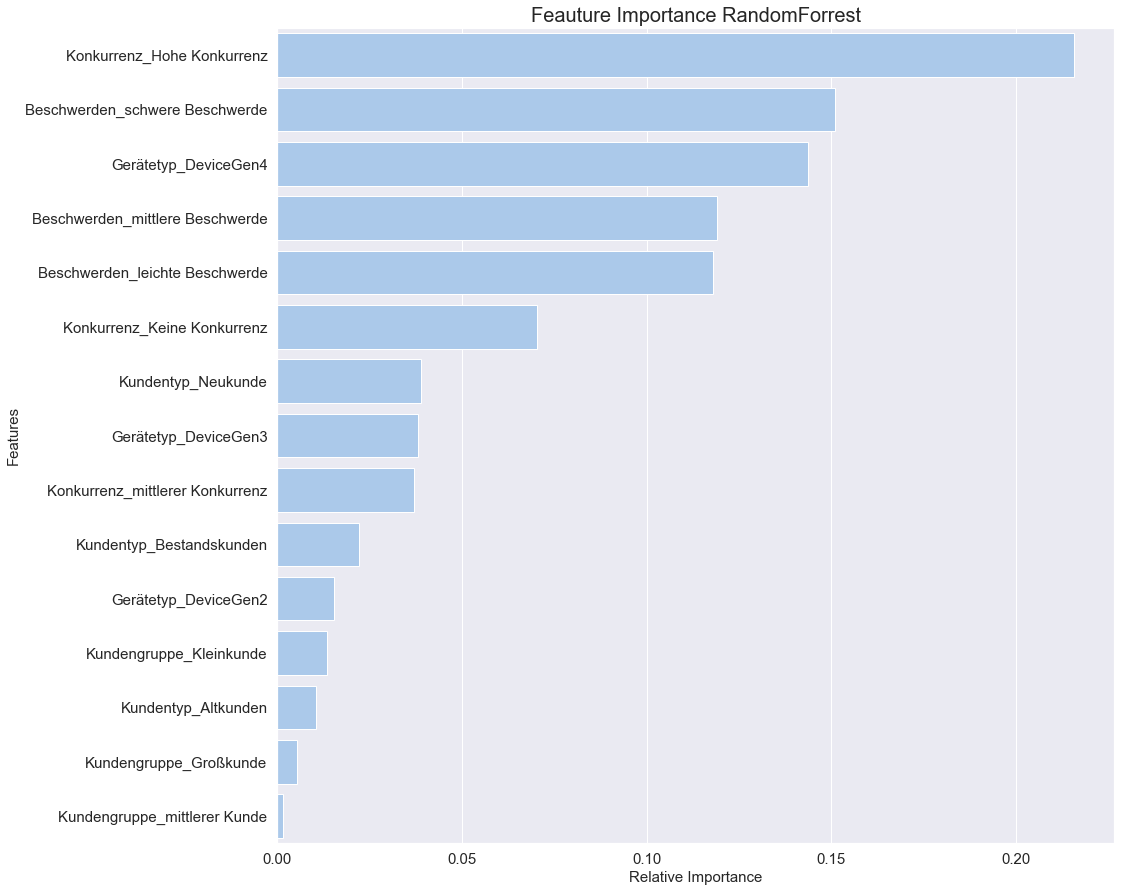

In [374]:
feature_importances = pd.DataFrame(rf_fit_grid.feature_importances_,index = X_train.columns,
                                   columns=['importance']).sort_values('importance', \
                                                                        ascending=False)
# Reducing on Top feautures 
rf_uop_feat=feature_importances.head(20).sort_values(by='importance',ascending=False).reset_index()

# Building plot 
sns.set(font_scale = 1)
f= plt.figure(figsize=(15, 15))
sns.set_color_codes("pastel")
bar=sns.barplot(x="importance", y="index", data=rf_uop_feat, color='b')
bar.axes.set_title("Feauture Importance RandomForrest", size=20)
bar.set_xlabel("Relative Importance",fontsize=15)
bar.set_ylabel("Features",fontsize=15)
bar.tick_params(labelsize=15)
figure = bar.get_figure()   
plt.show();

## Weitere Under- vs. Overfittung Analysen

## Verhältnis spezifischer Hyperparameter

Druchgang Nummer: 1
Druchgang Nummer: 2
Druchgang Nummer: 3
Druchgang Nummer: 5
Druchgang Nummer: 7
Druchgang Nummer: 8
Druchgang Nummer: 9
Druchgang Nummer: 10
Druchgang Nummer: 15
Druchgang Nummer: 18
Druchgang Nummer: 20
Druchgang Nummer: 23
Druchgang Nummer: 50
Druchgang Nummer: 100
Druchgang Nummer: 1000
Druchgang Nummer: 1500
Druchgang Nummer: 2000
Druchgang Nummer: 2500


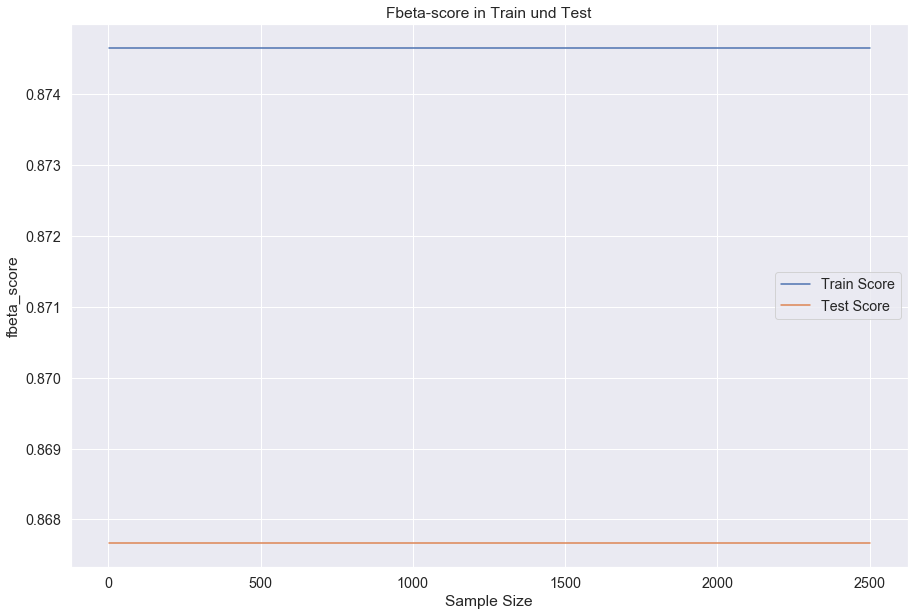

In [358]:
n_estimators = [1,2,3,5,7,8,9,10,15,18,20,23,50,100,1000,1500,2000,2500]
train_results = {}
test_results ={}

for estim in n_estimators:
    print("Druchgang Nummer:", estim)
    rf_estim = RandomForestClassifier(n_estimators=estim, n_jobs=-1,oob_score=True,
                              class_weight='balanced').set_params(**best_params_grid)

    rf_estim_fit=rf_estim.fit(X_train, y_train)
    train_pred = rf_estim_fit.predict(X_train)
    f1_train=fbeta_score(y_train, train_pred,average='weighted',beta=1.5)
    train_results[estim]=f1_train
    
    test_pred = rf_estim_fit.predict(X_test)
    f1_test=fbeta_score(y_test, test_pred,average='weighted',beta=1.5)
    test_results[estim]=f1_test
    
df_train=pd.DataFrame.from_dict(train_results, orient='index').reset_index()
df_train.rename(columns={df_train.columns[0]:'Sample Size',df_train.columns[1]:'F1-Train'}, inplace=True)

df_test=pd.DataFrame.from_dict(test_results, orient='index').reset_index()
df_test.rename(columns={df_test.columns[0]:'Sample Size',df_test.columns[1]:'F1-Test'}, inplace=True)

df_train_test = df_train.merge(df_test,on='Sample Size',how='left')

sns.set(font_scale = 1.3)
plt.figure(figsize=(15, 10))
g=sns.lineplot(x="Sample Size", y="F1-Train", data=df_train_test, label='Train Score')
g=sns.lineplot(x="Sample Size", y="F1-Test", data=df_train_test, label='Test Score')
g.set(ylabel='fbeta_score')
plt.title("Fbeta-score in Train und Test")
plt.show()

## Untersuchung von Trainings- und Testdatenmengen

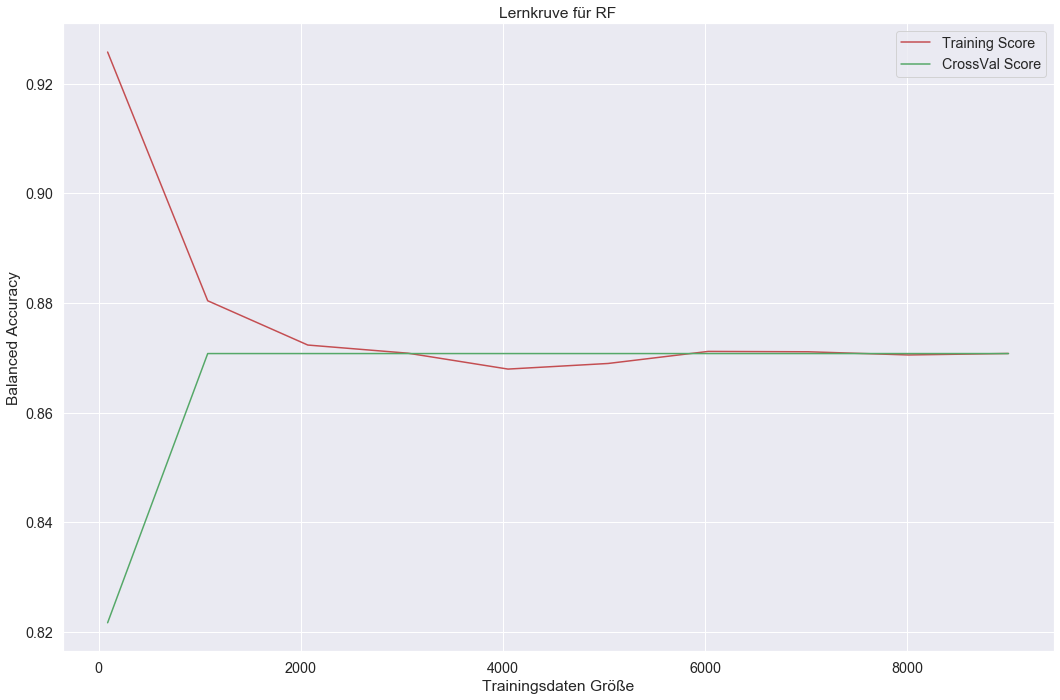

In [369]:
from sklearn.model_selection import learning_curve

sizes, training_scores, testing_scores = learning_curve(rf_best_grid, X, Y, 
                                    cv=10, scoring='balanced_accuracy', train_sizes=np.linspace(0.01, 1.0, 10)) 
  
# Durchschnitt der Trainingsergebnisse
mean_train = np.mean(training_scores, axis=1) 
  
# Durchschnitt der Testergebnisse
mean_test = np.mean(testing_scores, axis=1) 
    
# Plotten
plt.figure(figsize=(15, 10))
plt.plot(sizes, mean_train, color="r",  label="Training Score") 
plt.plot(sizes, mean_test, color="g", label="CrossVal Score") 
plt.title("Lernkruve für RF") 
plt.xlabel("Trainingsdaten Größe"), 
plt.ylabel("Balanced Accuracy"), 
plt.legend(loc="best") 
plt.tight_layout() 
plt.show()

# Exkurs: Fehlersuche und Threshold-Diskussion

## Konfusionsmatrix - Wo treten Fehler auf?

In [202]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# Cross-val-predict anhand von k-fold
y_train_pred=cross_val_predict(rf_best_grid,X_train,y_train,cv=kfold)

# Konfusionsmatrix
konf_matrix=confusion_matrix(y_train,y_train_pred)

# Summe der Fälle - Zeilenebene 
row_sums = konf_matrix.sum(axis=1, keepdims=True)

# Relative Fehler
norm_conf_mx = konf_matrix / row_sums

np.fill_diagonal(norm_conf_mx, 0) 

Text(107.5, 0.5, 'True Values')

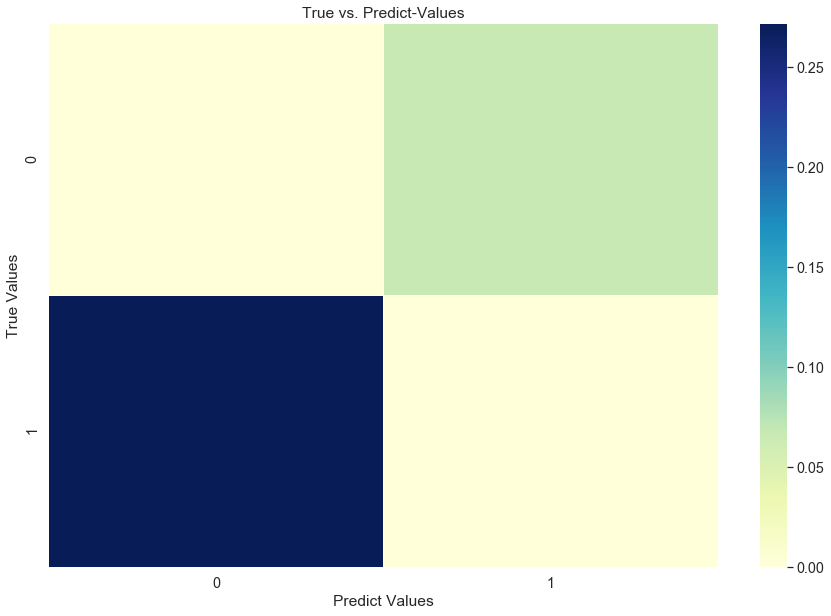

In [203]:
# Heatmap der True vs. Predicted Relation
plt.figure(figsize=(15, 10))
plt.title('True vs. Predict-Values')
sns.heatmap(norm_conf_mx,cmap='YlGnBu',linewidths=.5)
plt.xlabel("Predict Values")
plt.ylabel("True Values")

<details><summary>Zynische Erklärung am Beispiel  polizeilicher Fehlentscheidungen</summary>
<p>

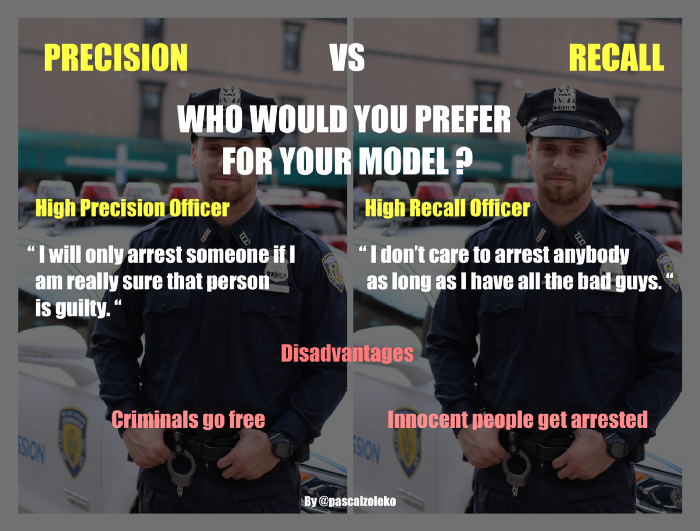
Quelle([Zoleko 2019](https://medium.com/@zzpp/precision-vs-recall-in-1-minute-9d5fa5653a68))
</p>
</details>

## Precision und Recall - Threshold Analyse

Sinnvoll erscheint hier eine Diskussion der Precision und Recall Kurven in Relation zum Entscheidungsschwellwert: "Ab welcher Wahrscheinlichkeit sprechen wir von einer Kündigung?". 

In [378]:
# Schätzung der Wahrscheinlichkeit
y_hat_grid=rf_fit_grid.predict(X_train)

# Prediction der Wahrscheinlichkeit
y_hat_grid_proba=rf_fit_grid.predict_proba(X_train)

Das Ergebnis ist ein Array mit Eintrittswahrscheinlichkeiten. Links (keine Kündigung) und rechts (Kündigung) ergeben aufsummiert immer 100%. 

In [379]:
y_hat_grid_proba

array([[0.98476053, 0.01523947],
       [0.82511922, 0.17488078],
       [0.87935196, 0.12064804],
       ...,
       [0.90256163, 0.09743837],
       [0.61335799, 0.38664201],
       [0.70636045, 0.29363955]])

Für die Threshold Analyse interessiert uns nur der Ereigniseintritt, also die Kündigungswahrscheinlichkeit.

In [380]:
# Slicing der äußeren Spalte 
y_hat_churn=y_hat_grid_proba[:,1]

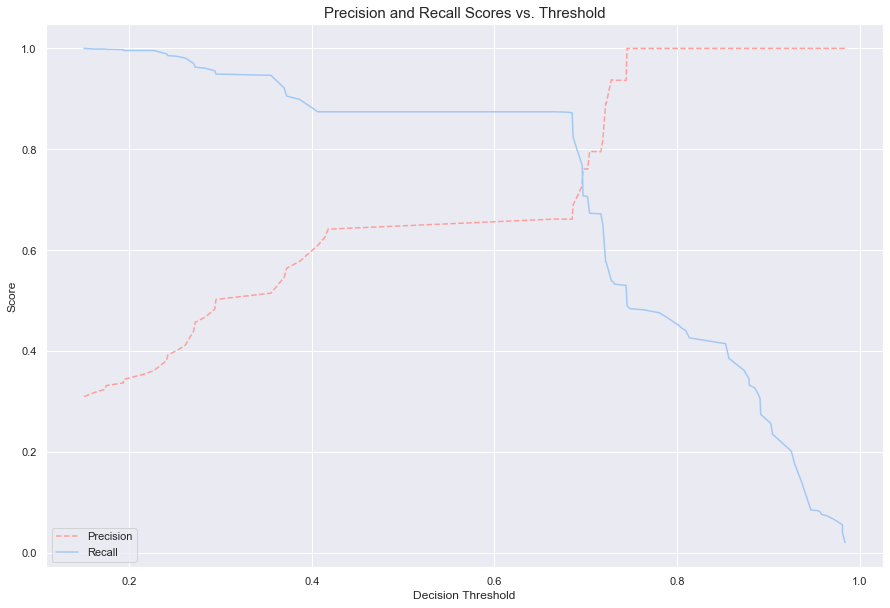

In [385]:
from sklearn.metrics import precision_recall_curve

# Extraktion der precision, recall und der thresholds
precision, recall, threshold = precision_recall_curve(y_train, y_hat_churn)

# Plot beider Kurven vs. Threshold
plt.figure(figsize=(15, 10))
plt.title("Precision and Recall Scores vs. Threshold",size=15)
plt.plot(threshold, precision[:-1], "r--", label="Precision")
plt.plot(threshold, recall[:-1], "b-", label="Recall")
plt.ylabel("Score")
plt.xlabel("Decision Threshold")
plt.legend(loc='best')
plt.show();

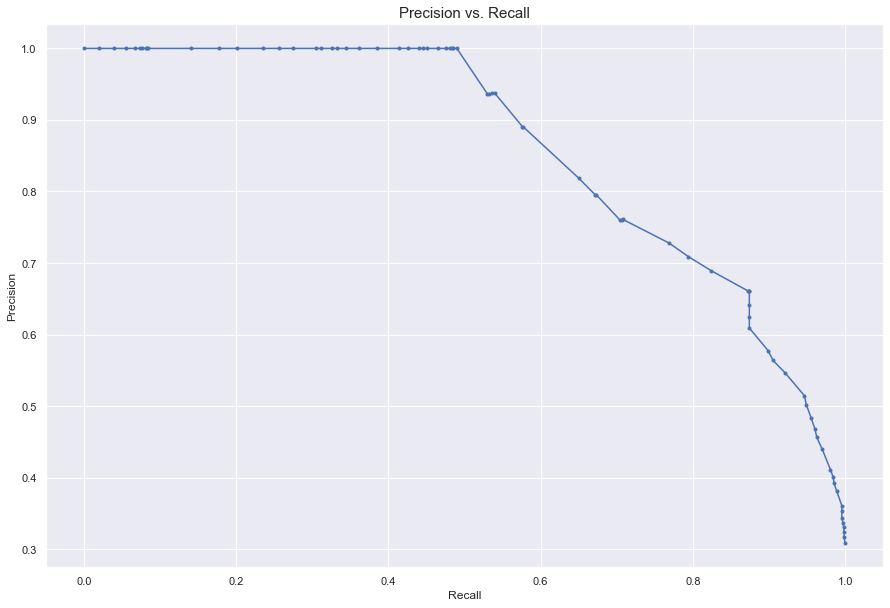

In [386]:
# Plot Precision vs. Recall
plt.figure(figsize=(15, 10))
plt.title("Precision vs. Recall",size=15)
plt.plot(recall, precision, marker='.', label='Precision-Recall-Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# Save Model and Load Model

Das Pickle Format ist eine gänge Variante ML-Modelle abzuspeichern. Eine weitere Variante wäre das Joblib Format. Informationen zu Vor- und Nachteile beider Formate, findet ihr [hier](https://stackoverflow.com/questions/12615525/what-are-the-different-use-cases-of-joblib-versus-pickle) und [hier](https://scikit-learn.org/stable/modules/model_persistence.html).

In [393]:
# Pickle Save
import pickle

# Name definieren
clf_name='Churn_classifier.pkl'

# Model abspeichern
with open(clf_name, 'wb') as file:
    pickle.dump(rf_fit_grid, file)

In [394]:
# Laden
churn_pred = pickle.load(open(clf_name,'rb'))

In [397]:
# Prediction 
load_pred=churn_pred.predict_proba(X_test)
load_pred

array([[0.73878916, 0.26121084],
       [0.75918178, 0.24081822],
       [0.97455017, 0.02544983],
       ...,
       [0.25583544, 0.74416456],
       [0.75918178, 0.24081822],
       [0.85456254, 0.14543746]])

# Weitere Optimierungstechniken 

Sofern ich euch nicht abgeschreckt habe und ihr noch weiter am Thema interessiert seid, dann könnt ihr noch einige weitere Maßnahmen ausprobieren: [Oversampling oder Undersampling](https://imbalanced-learn.readthedocs.io/en/stable/auto_examples/index.html)-Techniken, [Feature-Selektion](https://scikit-learn.org/0.22/auto_examples/inspection/plot_permutation_importance.html) anhand der *Feature Importance* und [Unsupervised Outlier-Diagnostics](https://scikit-learn.org/stable/modules/outlier_detection.html). 

# Ergänzung

Anbei findet ihr ein etwas komplexeres Grid mit Gewichtungsparameter. Achtung: wirklich lange Rechenzeiten!

In [ ]:
def grid(X_train, Y_train):   
    '''
    Input: 
    X_train = x_sample
    Y_train = y_sample
    
    Return: 
    
    Best balanced_accuracy-values and best params based on gridsearch params
    '''
    
    weights=np.linspace(0.0,0.99,100)
    
    model = RandomForestClassifier(n_jobs=-1)
        
    
    param_grid = { 
            "n_estimators":[50,100,400,800,1000,1200],
            "max_depth": [2,5,10,20,50,100],
            'max_features': ['log2','auto'],
            "min_samples_split": [2,4,5,10],
            "criterion":['gini','entropy'],
            "oob_score":[False,True],
            "class_weight":[{0:x, 1:1.0-x} for x in weights]
            }
    
    grid = GridSearchCV(estimator=rf_best, param_grid=param_grid, n_jobs=-1, cv=3, 
                        verbose=10, scoring='f1_weighted')

    grid.fit(X_train, Y_train)
    

    return grid.best_score_ , grid.best_params_

In [ ]:
# Gridsearch 
start=time.time()
best_score_grid , best_params_grid= grid(X_train, y_train)
end=time.time()
print("Calculation time of GridSearch was {:.2f} Minutes ".format((end-start)/60))